![](etc/callbacks.png)

### tf.kerasm.callbacks.ModelCheckpoint

### tf.keras.callbacks.TensorBoard
텐서보드 링크들  
https://www.tensorflow.org/tensorboard/get_started?hl=ko  
    https://www.tensorflow.org/guide/migrate/tensorboard  

In [ ]:
#1.OS환경만들기  
import os  # 탐색기 모듈. os.path
os.environ['KERAS_BACKEND']  ='tensorflow'
kerasBKED  = os.environ['KERAS_BACKEND']
print(kerasBKED)

In [ ]:
""" ▶ Step 1. ModelCheckpoint 준비 """
 # 21 콜백

In [2]:
""" ▶ Step 1. 데이터 만들기 """

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, TensorBoard

x = np.linspace(0, 10, num = 50)
y = 2* x + 3 

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[ 3.          3.40816327  3.81632653  4.2244898   4.63265306  5.04081633
  5.44897959  5.85714286  6.26530612  6.67346939  7.08163265  7.48979592
  7.89795918  8.30612245  8.71428571  9.12244898  9.53061224  9.93877551
 10.34693878 10.75510204 11.16326531 11.57142857 11.97959184 12.3877551
 12.79591837 13.20408163 13.6122449  14.02040816 14.42857143 14.83673469
 15.24489796 15.65306122 1

In [7]:
""" ▶ Step 2. 모델 만들고 컴파일 후 학습 """

import os
import datetime
model = Sequential([
    Dense(1, input_shape=(1,), activation = 'linear')
])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, verbose = 1, mode = 'auto', start_from_epoch=10)

csv_logger = CSVLogger('./logs/training.csv')

log_dir = os.path.join('logs', 'fit', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)

model.compile(optimizer = 'sgd', loss = 'mse')

model.fit(x_train, y_train, epochs = 500, callbacks = [early_stopping, csv_logger, tensorboard_callback], validation_data = (x_test, y_test))

print(model.get_weights())

Epoch 1/500
2/2 [==============================] - 0s 162ms/step - loss: 30.6217 - val_loss: 4.5116
Epoch 2/500
2/2 [==============================] - 0s 57ms/step - loss: 6.0680 - val_loss: 0.1568
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 2.6286 - val_loss: 2.2037
Epoch 4/500
2/2 [==============================] - 0s 46ms/step - loss: 1.9128 - val_loss: 4.5076
Epoch 5/500
2/2 [==============================] - 0s 46ms/step - loss: 1.7829 - val_loss: 5.4509
Epoch 6/500
2/2 [==============================] - 0s 44ms/step - loss: 1.7637 - val_loss: 5.0432
Epoch 7/500
2/2 [==============================] - 0s 45ms/step - loss: 1.7242 - val_loss: 5.1939
Epoch 8/500
2/2 [==============================] - 0s 46ms/step - loss: 1.6688 - val_loss: 3.4671
Epoch 9/500
2/2 [==============================] - 0s 44ms/step - loss: 1.6212 - val_loss: 4.6786
Epoch 10/500
2/2 [==============================] - 0s 51ms/step - loss: 1.5900 - val_loss: 3.6655
Epoch 11/500
2/2 

1/1 [==============================] - 0s 20ms/step


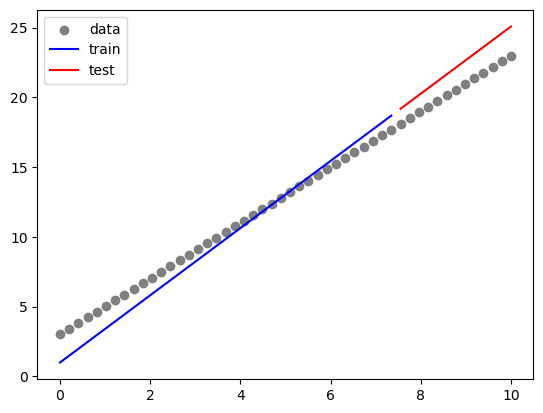

In [8]:
plt.scatter(x,y, label='data',color ='gray')
plt.plot (x_train , model.predict(x_train), label ='train', color ='blue')
plt.plot(x_test, model.predict(x_test), label ='test' ,color ='red')
plt.legend() 

In [9]:
%load_ext tensorboard
#%tensorboard --logdir {classifier.model_dir}
%tensorboard --logdir logs/fit